# Examples of how to use Spectrogram class to create spectrograms

In [1]:
from opensoundscape.audio import Audio
from opensoundscape.spectrogram import Spectrogram

# 1. Create a spectrogram and save to file (as png image) with default parameters

## this is the standard way to create spectrograms from audio

In [2]:
#specify audio file
audio_path = '../audio/1min.wav'

#create Audio object
audio_object = Audio.from_file(audio_path)

#create Spectrogram object
spectrogram_object = Spectrogram.from_audio(audio_object)

#create image from Spectrogram object
spectrogram_image = spectrogram_object.to_image()

#save image file
image_path = './saved_spectrogram.png'
spectrogram_image.save(image_path)

### equivalent one-line version:

In [3]:
Spectrogram.from_audio(Audio.from_file('../audio/1min.wav')).to_image().save('./saved_spectrogram.png')

the above example should be used for all image creation for model training. 

Other examples in this notebook (below) illustrate other functionality of the Spectrogram class

# 2. Specify target shape for the image 

In [4]:
image_shape = (224,224)
Spectrogram.from_audio(Audio.from_file('../audio/1min.wav')).to_image(shape=image_shape).save('./saved_spectrogram_2.png')

# 3. Select five seconds of audio from a file, create a spectrogram, and display it

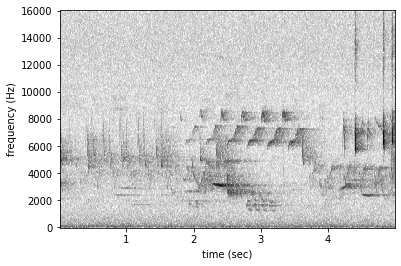

In [5]:
#load the audio file
audio = Audio.from_file('../audio/1min.wav')

#trim to first five seconds
audio = audio.trim(0,5)

#create spectrogram
spec = Spectrogram.from_audio(audio)

#display the spectrogram
spec.plot()

# 4. Use custom parameters to create a spectrogram with high time-resolution

also trim the spectrogram in frequency and time

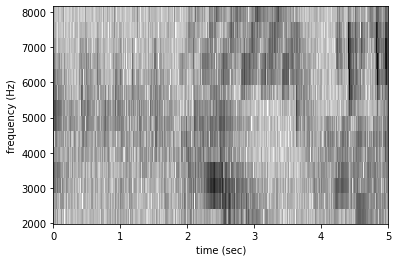

In [6]:
#load audio with 44.1 kHz sampling rate 
audio = Audio.from_file('../audio/1min.wav',sample_rate=44100)

#create a spectrogram with 100-sample windows (100/44100 seconds of audio per window) and no overlap
spec = Spectrogram.from_audio(audio,window_samples=100,overlap_samples=0)

#trim the spectrogram in time and frequency
spec = spec.trim(0,5)
spec = spec.bandpass(2000,8000)
spec.plot()

# 5. Create an amplitude signal from a spectrogram

In [7]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'amplitude')

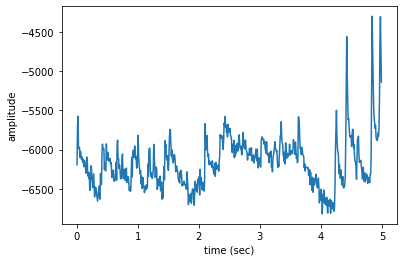

In [8]:
# make a spectrogram
spec = Spectrogram.from_audio(Audio.from_file('../audio/1min.wav').trim(0,5))

# get the amplitude signal (vertical sum) in a range of frequencies
high_freq_amplitude = spec.amplitude(freq_range=[5000,10000])
plt.plot(spec.times,high_freq_amplitude)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')

# 6. View the properties of a Spectrogram

In [9]:
spec = Spectrogram.from_audio(Audio.from_file('../audio/1min.wav'))
print(f'the first few times: {spec.times[0:5]}')
print(f'the first few frequencies: {spec.frequencies[0:5]}')

the first few times: [0.008 0.016 0.024 0.032 0.04 ]
the first few frequencies: [  0.   62.5 125.  187.5 250. ]
